In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import tensorflow.compat.v1 as tf
from matplotlib import pyplot as plt
import numpy as np

from contact_graspnet.dataloading import YCBSimulationData
from contact_graspnet.preprocessing import YCBSimulationDataPreprocessor
from contact_graspnet.models import ContactGraspnet

from contact_graspnet.orig.contact_graspnet.visualization_utils import visualize_grasps

/home/moritz/Documents/ContactGraspnetBenchmark/contact_graspnet/orig/pointnet2/tf_ops/sampling


In [3]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

tf.disable_eager_execution()
physical_devices = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
dataset_path = Path.home() / "Documents" / "ycb_sim_data_2"

checkpoint_dir = Path.cwd().parent / "contact_graspnet" / "checkpoints" / "scene_test_2048_bs3_hor_sigma_001"
config_path = checkpoint_dir / "config.yaml"

In [5]:
dataset = YCBSimulationData(dataset_path)
sample = dataset[1]

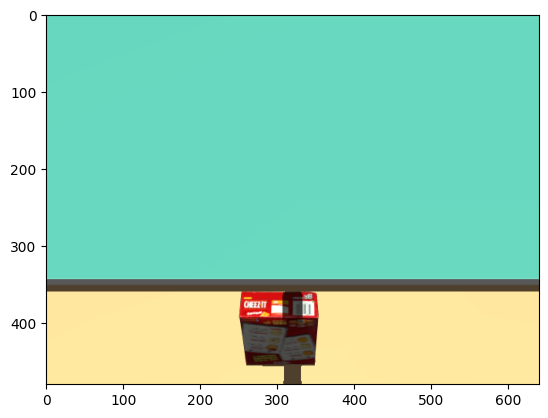

In [6]:
plt.imshow(sample.rgb)

In [7]:
preprocessor = YCBSimulationDataPreprocessor()

In [8]:
model = ContactGraspnet(checkpoint_dir=checkpoint_dir, config_path=config_path, batch_size=1)

--- Get model


/home/moritz/Documents/ContactGraspnetBenchmark/contact_graspnet/orig/pointnet2/utils/tf_util.py:571: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  momentum=bn_decay, axis=axis, name=scope,


('loading ', '/home/moritz/Documents/ContactGraspnetBenchmark/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054')


In [9]:
pointcloud = preprocessor(sample)

pred_grasps_cam, scores, contact_pts = model(pointcloud)

Generated 2 grasps


In [11]:
visualize_grasps(
    pointcloud, pred_grasps_cam, scores, plot_opencv_cam=True#, pc_colors=(preprocessor.intermediate_results["pointcloud_colors"] * 255).astype(np.uint8)
)

Visualizing...takes time


IndexError: arrays used as indices must be of integer (or boolean) type